# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [2]:
# Bibliotecas Externas
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import torch

# Bibliotecas Locais
os.chdir("..")
from lib import plots, runner

# Definido Variáveis globais e ignorando Warninig
warnings.filterwarnings("ignore")
N_SPLITS = 5
RANDOM_STATE = 51
GPU_AVALIABLE = torch.cuda.is_available()

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [3]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)


## 1. Algoritmos de Machine Learning para Classificação

### 1.1 - KNN

### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

df_knn, model_knn, params_knn = runner.search_params(knn, param_distributions_knn, X_train, Y_train)

runner.save_model(model_knn, "knn")
runner.save_results(df_knn, "knn")

df_knn

Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Tempo de busca: 19.33s


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.803106,1.0,0.810707,1.0,0.769710,1.0,0.756740,1.0,"[0.0, 0.1505281690140845, 1.0]","[0.0, 0.7567401960784313, 1.0]"
4,5,0.801073,1.0,0.810707,1.0,0.766213,1.0,0.742489,1.0,"[0.0, 0.14034315882094148, 1.0]","[0.0, 0.7424892703862661, 1.0]"
2,3,0.798866,1.0,0.807633,1.0,0.764059,1.0,0.745555,1.0,"[0.0, 0.14782226132864057, 1.0]","[0.0, 0.7455548743102391, 1.0]"
0,1,0.796344,1.0,0.807170,1.0,0.759962,1.0,0.730392,1.0,"[0.0, 0.13770347558293006, 1.0]","[0.0, 0.7303921568627451, 1.0]"
3,4,0.787350,1.0,0.798156,1.0,0.749204,1.0,0.721643,1.0,"[0.0, 0.1469423669159701, 1.0]","[0.0, 0.7216431637032495, 1.0]"


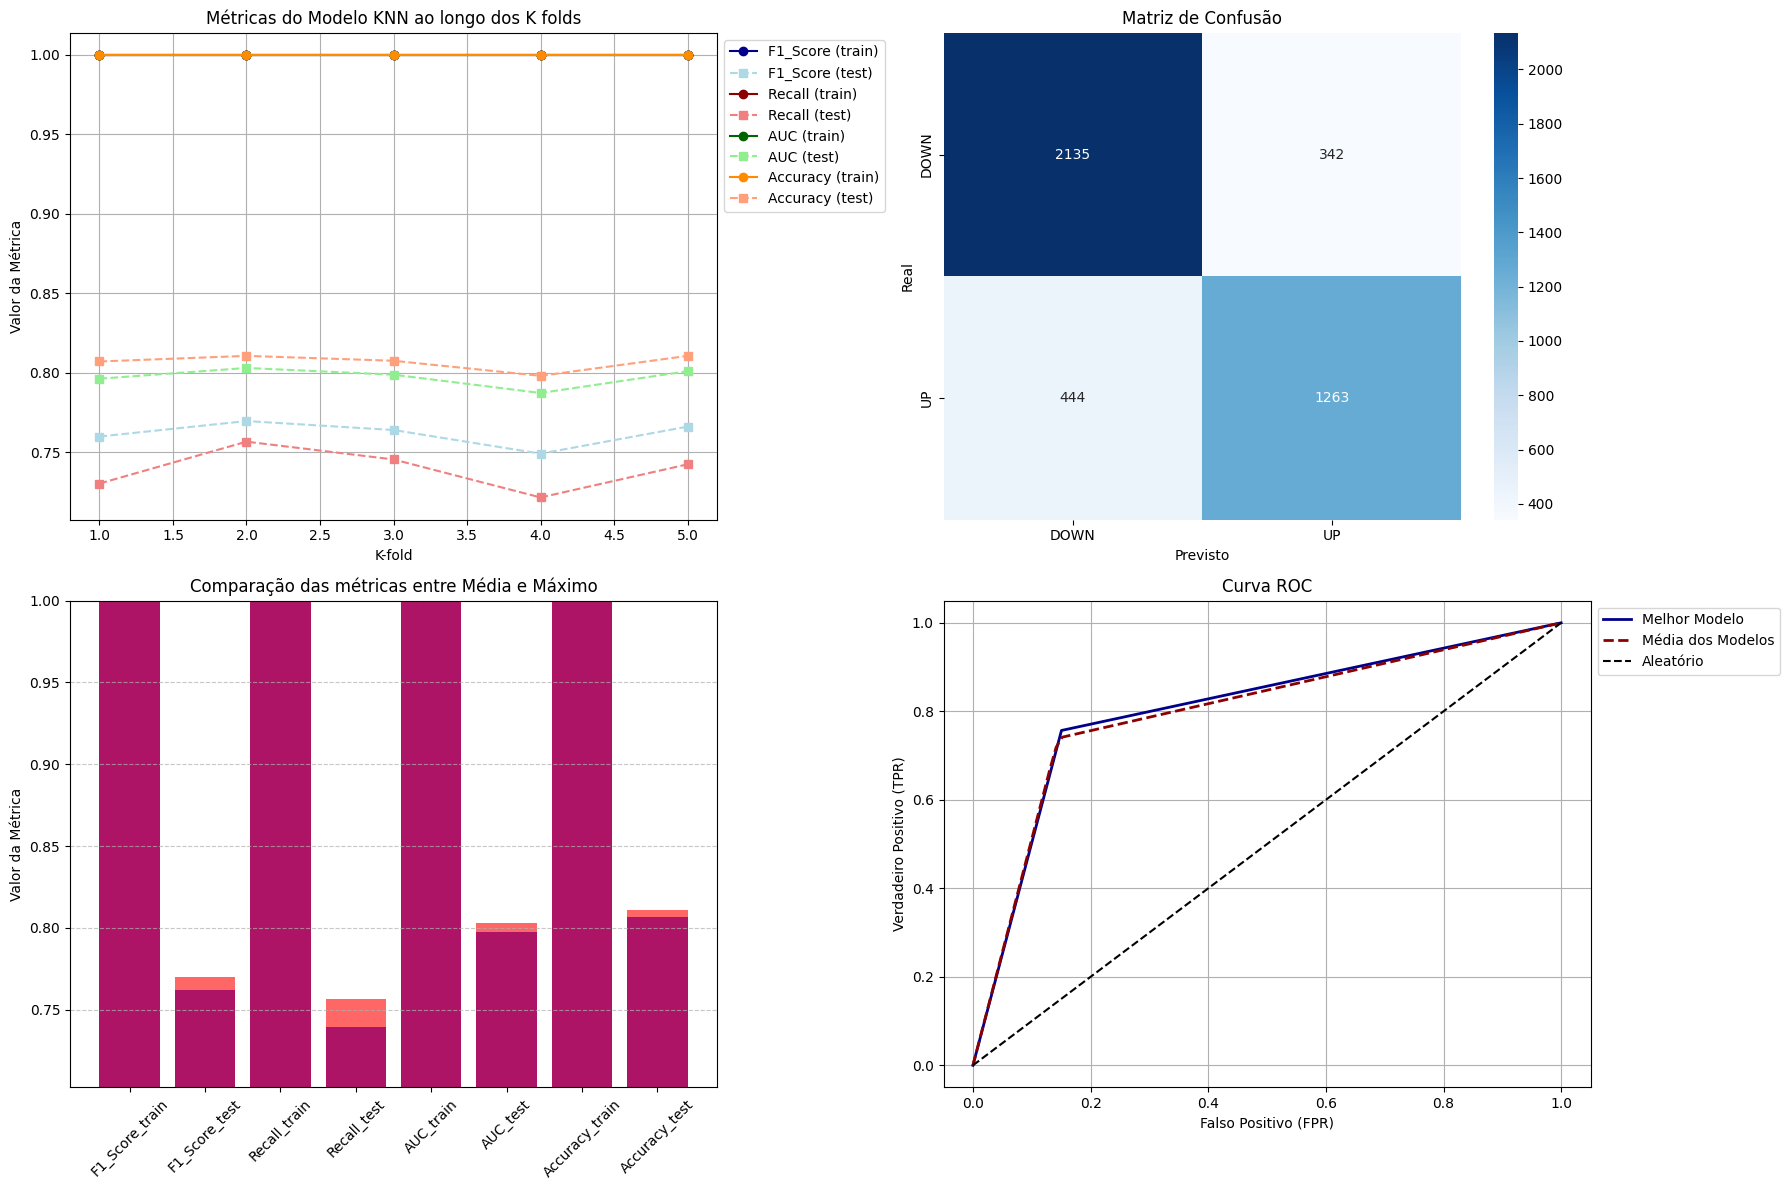

In [5]:
plots.model_evaluate(model_knn, df_knn, X_test, Y_test, model_name="KNN")

### 1.2 - Randon Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

param_distributions_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 10, 20, 50, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

df_rf, model_rf, params_rf = runner.search_params(rf, param_distributions_rf, X_train, Y_train)

runner.save_model(model_rf, "random_forest")
runner.save_results(df_rf, "random_forest")

df_rf

Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': False}
Tempo de busca: 76.30s


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
0,1,0.892744,0.999923,0.897567,0.999936,0.875699,0.999923,0.863358,0.999847,"[0.0, 0.07787065552133744, 1.0]","[0.0, 0.8633578431372549, 1.0]"
4,5,0.887963,0.999923,0.892930,0.999936,0.870025,0.999923,0.857756,0.999847,"[0.0, 0.0818301803783546, 1.0]","[0.0, 0.8577559779276518, 1.0]"
1,2,0.887091,0.999945,0.890881,0.999936,0.868762,0.999923,0.863971,1.000000,"[0.0, 0.0897887323943662, 1.0]","[0.0, 0.8639705882352942, 1.0]"
2,3,0.886610,0.999923,0.892162,0.999936,0.868561,0.999923,0.852851,0.999847,"[0.0, 0.0796304443466784, 1.0]","[0.0, 0.8528510116492949, 1.0]"
3,4,0.881305,0.999923,0.887295,0.999936,0.862328,0.999923,0.844880,0.999847,"[0.0, 0.08227012758468984, 1.0]","[0.0, 0.8448804414469651, 1.0]"


In [ ]:
plots.model_evaluate(model_rf, df_rf, X_test, Y_test, model_name="Random Forest")

### 1.3 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_distributions_dt = {
    'max_depth': [1, 2, 5, 10, 50, 100],
    'min_samples_split': [2, 3, 5, 7, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 3, 5, 7, 20, 50, 100] 
}

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

df_dt ,model_dt, params_dt  = runner.search_params(dt, param_distributions_dt,X_train, Y_train)

runner.save_model(model_dt, 'decision_tree')
runner.save_results(df_dt, 'decision_tree')

df_dt

Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50}
Tempo de busca: 1.21s


Cross-Validation (5-folds):   0%|          | 0/5 [00:00<?, ?it/s]

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.851897,0.981792,0.856045,0.983031,0.827607,0.979582,0.826593,0.974253,"[0.0, 0.12279929577464789, 1.0]","[0.0, 0.8265931372549019, 1.0]"
0,1,0.850447,0.981170,0.855570,0.982710,0.825818,0.979154,0.819240,0.971801,"[0.0, 0.11834579850417949, 1.0]","[0.0, 0.8192401960784313, 1.0]"
2,3,0.848960,0.979412,0.855277,0.981366,0.823933,0.977475,0.810546,0.967515,"[0.0, 0.11262648482182139, 1.0]","[0.0, 0.8105456774984672, 1.0]"
4,5,0.846313,0.982544,0.851691,0.984056,0.820909,0.980777,0.813611,0.973337,"[0.0, 0.12098548174219094, 1.0]","[0.0, 0.8136112814224402, 1.0]"
3,4,0.841855,0.981966,0.848617,0.983736,0.815485,0.980356,0.800736,0.971192,"[0.0, 0.11702595688517378, 1.0]","[0.0, 0.8007357449417535, 1.0]"


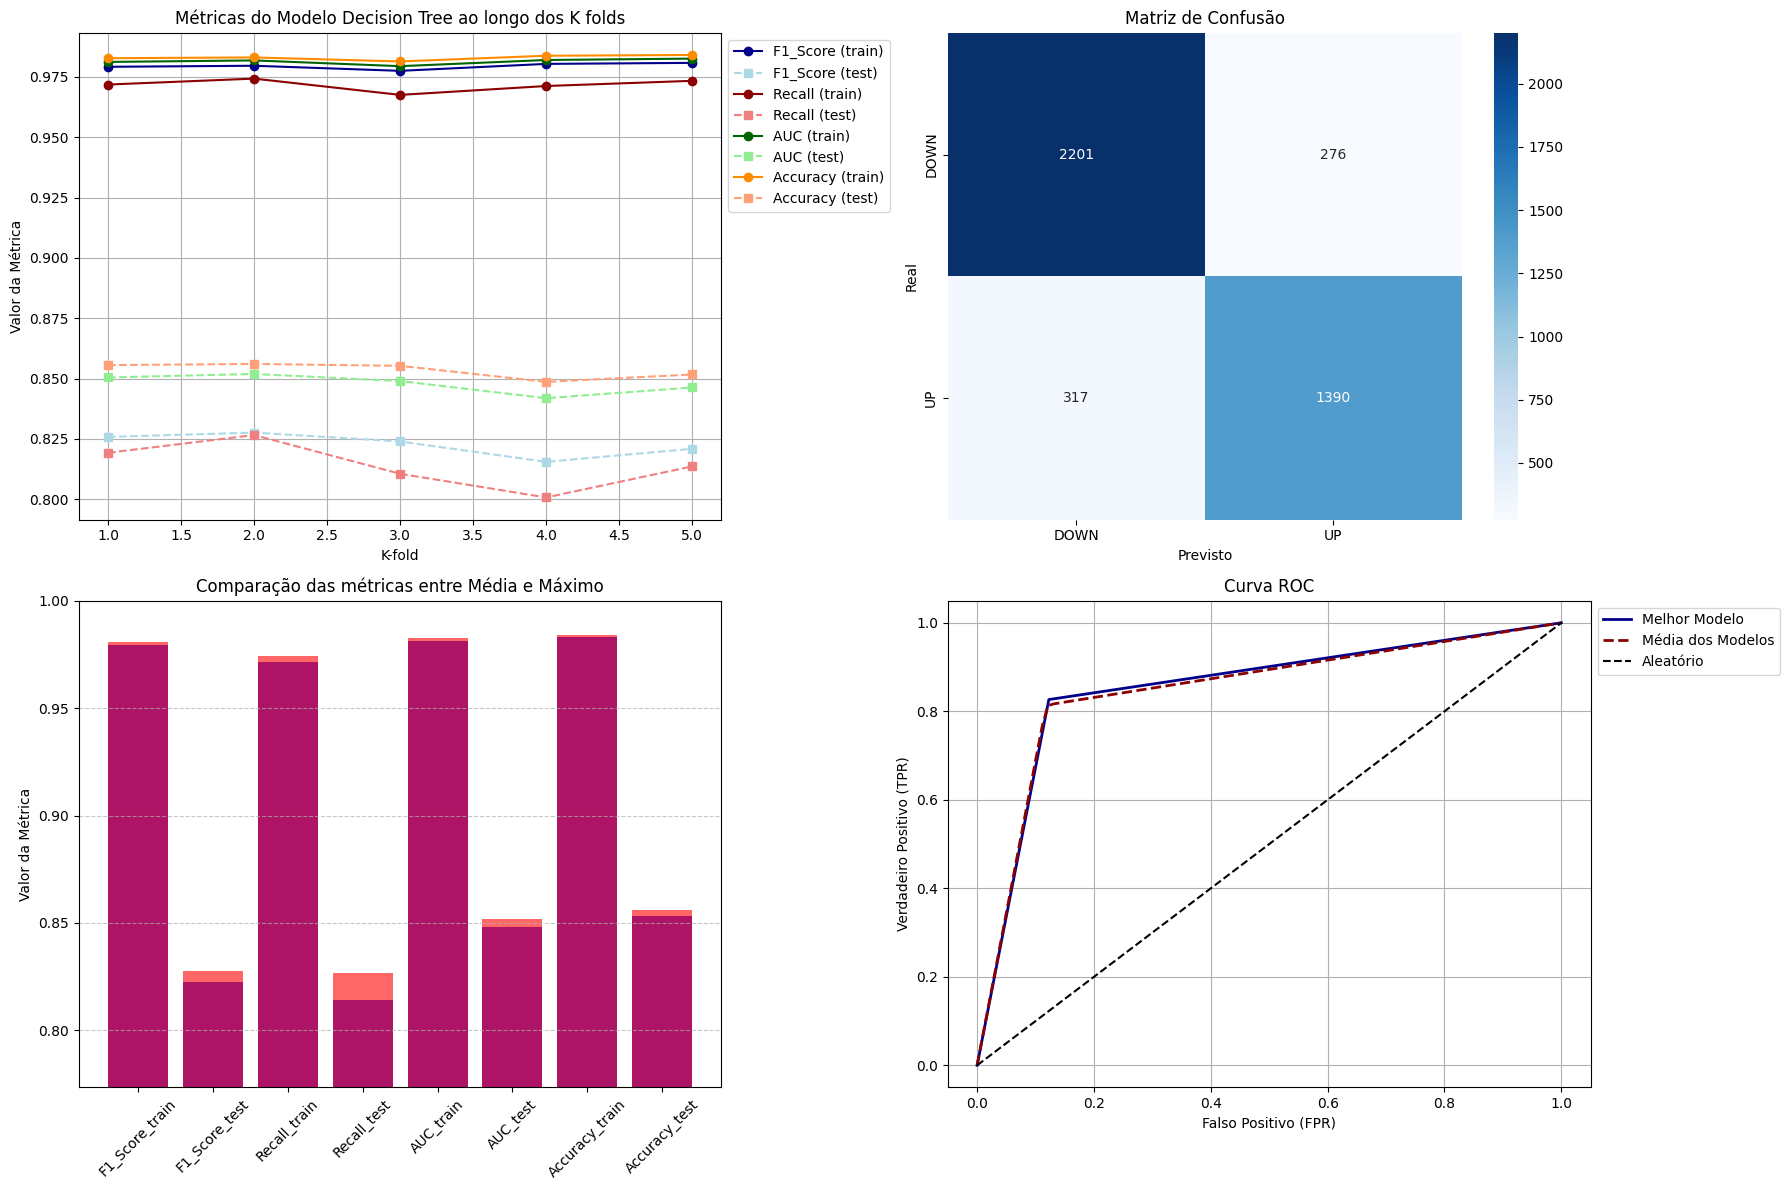

In [ ]:
plots.model_evaluate(model_dt, df_dt, X_test, Y_test, model_name="Decision Tree")

### LightGBM

In [ ]:
import lightgbm as lgb